In [1]:
# !pip install polars

# Download các thư viện cần thiết


In [2]:
import os
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Đọc file train (1 phần)


## Định nghĩa hàm đọc toàn bộ dataset


In [3]:
def read_parquet_by_type(train_path: str):
    # Lấy tất cả các file parquet trong thư mục
    files = [os.path.join(train_path, f) for f in os.listdir(train_path) if f.endswith('.parquet')]
    
    # Phân loại các file theo loại tên
    user_chunk_files = [file for file in files if 'user_chunk' in file]
    purchase_history_chunk_files = [file for file in files if 'purchase_history_daily_chunk' in file]
    item_chunk_files = [file for file in files if 'item_chunk' in file]
    
    # Đọc các file riêng biệt thành DataFrame
    user_chunk_df = pl.concat([pl.read_parquet(file) for file in user_chunk_files]) if user_chunk_files else None
    purchase_history_chunk_df = pl.concat([pl.read_parquet(file) for file in purchase_history_chunk_files]) if purchase_history_chunk_files else None
    item_chunk_df = pl.concat([pl.read_parquet(file) for file in item_chunk_files]) if item_chunk_files else None
    
    # Trả về một dictionary chứa các DataFrame
    return {
        "user_chunk": user_chunk_df,
        "purchase_history_chunk": purchase_history_chunk_df,
        "item_chunk": item_chunk_df
    }

## Đọc toàn bộ dataset


In [4]:
train_path = './dataset'
dataframes = read_parquet_by_type(train_path)

## Kiểm tra DataFrame của từng loại data trong dataset


In [5]:
print("User Chunk DataFrame:")
dataframes["user_chunk"]

User Chunk DataFrame:


shape: (4_573_964, 18)
┌────────────┬────────┬──────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ customer_i ┆ gender ┆ location ┆ province   ┆ … ┆ install_da ┆ district  ┆ user_id   ┆ is_delete │
│ d          ┆ ---    ┆ ---      ┆ ---        ┆   ┆ te         ┆ ---       ┆ ---       ┆ d         │
│ ---        ┆ str    ┆ i32      ┆ str        ┆   ┆ ---        ┆ str       ┆ str       ┆ ---       │
│ i32        ┆        ┆          ┆            ┆   ┆ i64        ┆           ┆           ┆ bool      │
╞════════════╪════════╪══════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 14732      ┆ Nam    ┆ 155      ┆ Hồ Chí     ┆ … ┆ 1306281600 ┆ 7         ┆ e1e482066 ┆ false     │
│            ┆        ┆          ┆ Minh       ┆   ┆            ┆           ┆ 52bf8c279 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ ff0206c69 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ a80…      ┆           │
│ 15126      ┆ Nữ     ┆ 300      ┆ Hồ Chí     ┆ … ┆ 1306281600 ┆ Thủ Đức   ┆ 778917592 ┆ false     │
│            ┆        ┆          ┆ Minh       ┆   ┆            ┆           ┆ 04bd27e69 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ fb11a7b92 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ 889…      ┆           │
│ 29718      ┆ Nữ     ┆ 157      ┆ Bến Tre    ┆ … ┆ 1582070400 ┆ Bến Tre   ┆ b8041b584 ┆ false     │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ a0bb66553 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ 61727a0a6 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ 108…      ┆           │
│ 30077      ┆ Nữ     ┆ 53       ┆ Hồ Chí     ┆ … ┆ 1314230400 ┆ 1         ┆ c52ceaca4 ┆ false     │
│            ┆        ┆          ┆ Minh       ┆   ┆            ┆           ┆ 4a83ec41a ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ 219cfaff0 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ e05…      ┆           │
│ 30085      ┆ Nữ     ┆ 660      ┆ Hồ Chí     ┆ … ┆ 1314230400 ┆ Tân Phú   ┆ 74ac5764f ┆ false     │
│            ┆        ┆          ┆ Minh       ┆   ┆            ┆           ┆ 5d67d341a ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ acf238d77 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ 62f…      ┆           │
│ …          ┆ …      ┆ …        ┆ …          ┆ … ┆ …          ┆ …         ┆ …         ┆ …         │
│ 8800478    ┆ Nữ     ┆ 186      ┆ Đồng Nai   ┆ … ┆ 1749945600 ┆ Long      ┆ 0a7d1ac01 ┆ false     │
│            ┆        ┆          ┆            ┆   ┆            ┆ Khánh     ┆ 1c868e812 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ 1f75a8670 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ 4a7…      ┆           │
│ 8814340    ┆ Nữ     ┆ 385      ┆ Long An    ┆ … ┆ 1750291200 ┆ Bến Lức   ┆ af28e0cce ┆ false     │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ 3fe4a97ad ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ 95d4dcd19 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ 4e6…      ┆           │
│ 8810998    ┆ Nam    ┆ 1092     ┆ Bạc Liêu   ┆ … ┆ 1750204800 ┆ Đông Hải  ┆ 7607bd452 ┆ false     │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ a7b880af0 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ 505c27fd0 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆ 222…      ┆           │
│ 8793620    ┆ Nữ     ┆ 213      ┆ Bìn

# Phân tích dữ liệu (EDA)


## Task 1: Phân tích đơn biến (thống kê và trực quan hóa dữ liệu)


### User_chunk dataframe


In [6]:
user_chunk_df = dataframes['user_chunk']
user_chunk_df.head()
# gender, location, province, membership, sync_status_id, sync_error_message, region, location_name, install_app, district, is_deleted.

shape: (5, 18)
┌────────────┬────────┬──────────┬────────────┬───┬────────────┬──────────┬────────────┬───────────┐
│ customer_i ┆ gender ┆ location ┆ province   ┆ … ┆ install_da ┆ district ┆ user_id    ┆ is_delete │
│ d          ┆ ---    ┆ ---      ┆ ---        ┆   ┆ te         ┆ ---      ┆ ---        ┆ d         │
│ ---        ┆ str    ┆ i32      ┆ str        ┆   ┆ ---        ┆ str      ┆ str        ┆ ---       │
│ i32        ┆        ┆          ┆            ┆   ┆ i64        ┆          ┆            ┆ bool      │
╞════════════╪════════╪══════════╪════════════╪═══╪════════════╪══════════╪════════════╪═══════════╡
│ 14732      ┆ Nam    ┆ 155      ┆ Hồ Chí     ┆ … ┆ 1306281600 ┆ 7        ┆ e1e4820665 ┆ false     │
│            ┆        ┆          ┆ Minh       ┆   ┆            ┆          ┆ 2bf8c279ff ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆          ┆ 0206c69a80 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆          ┆ …          ┆           │
│ 15126      ┆ Nữ     ┆ 300      ┆ Hồ Chí     ┆ … ┆ 1306281600 ┆ Thủ Đức  ┆ 7789175920 ┆ false     │
│            ┆        ┆          ┆ Minh       ┆   ┆            ┆          ┆ 4bd27e69fb ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆          ┆ 11a7b92889 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆          ┆ …          ┆           │
│ 29718      ┆ Nữ     ┆ 157      ┆ Bến Tre    ┆ … ┆ 1582070400 ┆ Bến Tre  ┆ b8041b584a ┆ false     │
│            ┆        ┆          ┆            ┆   ┆            ┆          ┆ 0bb6655361 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆          ┆ 727a0a6108 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆          ┆ …          ┆           │
│ 30077      ┆ Nữ     ┆ 53       ┆ Hồ Chí     ┆ … ┆ 1314230400 ┆ 1        ┆ c52ceaca44 ┆ false     │
│            ┆        ┆          ┆ Minh       ┆   ┆            ┆          ┆ a83ec41a21 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆          ┆ 9cfaff0e05 ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆          ┆ …          ┆           │
│ 30085      ┆ Nữ     ┆ 660      ┆ Hồ Chí     ┆ … ┆ 1314230400 ┆ Tân Phú  ┆ 74ac5764f5 ┆ false     │
│            ┆        ┆          ┆ Minh       ┆   ┆            ┆          ┆ d67d341aac ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆          ┆ f238d7762f ┆           │
│            ┆        ┆          ┆            ┆   ┆            ┆          ┆ …          ┆           │
└────────────┴────────┴──────────┴────────────┴───┴────────────┴──────────┴────────────┴───────────┘

#### Phân tích đơn biến bằng thống kê


Ở đây tôi không sử dụng user_chunk_df.describe() vì đa số dữ liệu là dạng Categorical, không phải dạng numerical

Nếu mà mọi người tìm thấy cột nào numerical thì có thể sử dụng describe(['tên_cột']) để xem thống kê nhanh

In [7]:
# Các cột phân loại đã được liệt kê
categorical_columns = [
    "gender", "location", "province", "membership", "sync_status_id",
    "sync_error_message", "region", "location_name", "install_app", "district", "is_deleted"
]

# Tạo một danh sách để lưu các DataFrame tần suất của từng cột
value_counts_list = []

for col in categorical_columns:
    # Đếm tần suất cho mỗi cột
    value_counts = user_chunk_df[col].value_counts(sort=True)
    
    # Đổi tên các cột để dễ nhận diện
    value_counts = value_counts.rename({"count": f"{col}_count", col: f"{col}_value"})
    
    # Lưu DataFrame vào danh sách
    value_counts_list.append(value_counts)
    
    # Xuất DataFrame cho mỗi cột
    print(f"Tần suất cho cột '{col}':")
    print(value_counts)
    print("\n")

Tần suất cho cột 'gender':
shape: (3, 2)
┌──────────────┬──────────────┐
│ gender_value ┆ gender_count │
│ ---          ┆ ---          │
│ str          ┆ u32          │
╞══════════════╪══════════════╡
│ Nữ           ┆ 3424887      │
│ Nam          ┆ 1149069      │
│ Khác         ┆ 8            │
└──────────────┴──────────────┘


Tần suất cho cột 'location':
shape: (995, 2)
┌────────────────┬────────────────┐
│ location_value ┆ location_count │
│ ---            ┆ ---            │
│ i32            ┆ u32            │
╞════════════════╪════════════════╡
│ 766            ┆ 22383          │
│ 455            ┆ 21746          │
│ 598            ┆ 21509          │
│ 264            ┆ 20835          │
│ 687            ┆ 20563          │
│ …              ┆ …              │
│ 479            ┆ 40             │
│ 809            ┆ 17             │
│ 826            ┆ 5              │
│ 869            ┆ 1              │
│ 491            ┆ 1              │
└────────────────┴────────────────┘


Tần suất c

In [8]:
# Các cột phân loại đã được liệt kê
categorical_columns = [
    'gender', 'location', 'province', 'membership', 'sync_status_id', 
    'sync_error_message', 'region', 'location_name', 'install_app', 'district', 'is_deleted'
]

# Tạo một danh sách để lưu các DataFrame thống kê cho từng cột
mode_dataframes = []

# Tính toán mode cho mỗi cột phân loại
for col in categorical_columns:
    # Tính giá trị mode (giá trị xuất hiện nhiều nhất) mà không sử dụng .to_pandas()
    mode_val = user_chunk_df[col].mode()[0]  # mode() trả về một Series, ta lấy giá trị đầu tiên
    
    # Ép kiểu giá trị mode về dạng string để tránh lỗi khi gộp DataFrame
    mode_val = str(mode_val)
    
    # Tạo một DataFrame cho từng cột chứa mode
    mode_df = pl.DataFrame({
        "Column": [col],
        "Mode": [mode_val]
    })
    
    # Lưu DataFrame vào danh sách
    mode_dataframes.append(mode_df)
    
    # In từng DataFrame thống kê mode cho cột
    print(f"Mode của cột '{col}': {mode_val}")

# Ghép tất cả các DataFrame mode vào một bảng duy nhất
final_mode_df = pl.concat(mode_dataframes, how="vertical")

# In kết quả final_mode_df
final_mode_df


Mode của cột 'gender': Nữ
Mode của cột 'location': 766
Mode của cột 'province': Hồ Chí Minh
Mode của cột 'membership': Standard
Mode của cột 'sync_status_id': 2
Mode của cột 'sync_error_message': None
Mode của cột 'region': Đông Nam Bộ
Mode của cột 'location_name': DNA - 81 - 83 Nguyễn Văn Linh
Mode của cột 'install_app': In-Store
Mode của cột 'district': Thủ Đức
Mode của cột 'is_deleted': False


shape: (11, 2)
┌────────────────┬───────────────────────────────┐
│ Column         ┆ Mode                          │
│ ---            ┆ ---                           │
│ str            ┆ str                           │
╞════════════════╪═══════════════════════════════╡
│ gender         ┆ Nữ                            │
│ location       ┆ 766                           │
│ province       ┆ Hồ Chí Minh                   │
│ membership     ┆ Standard                      │
│ sync_status_id ┆ 2                             │
│ …              ┆ …                             │
│ region         ┆ Đông Nam Bộ                   │
│ location_name  ┆ DNA - 81 - 83 Nguyễn Văn Linh │
│ install_app    ┆ In-Store                      │
│ district       ┆ Thủ Đức                       │
│ is_deleted     ┆ False                         │
└────────────────┴───────────────────────────────┘

In [9]:
# Thống kê các giá trị Null và giá trị "không xác định" trong các cột phân loại


#### Phân tích đơn biến bằng trực quan hóa dữ liệu


C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\3446758829.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=user_chunk_df[col], ax=axes[i], palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\3446758829.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=user_chunk_df[col], ax=axes[i], palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\3446758829.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=user_chunk_df[col], ax=axes[i], palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14756

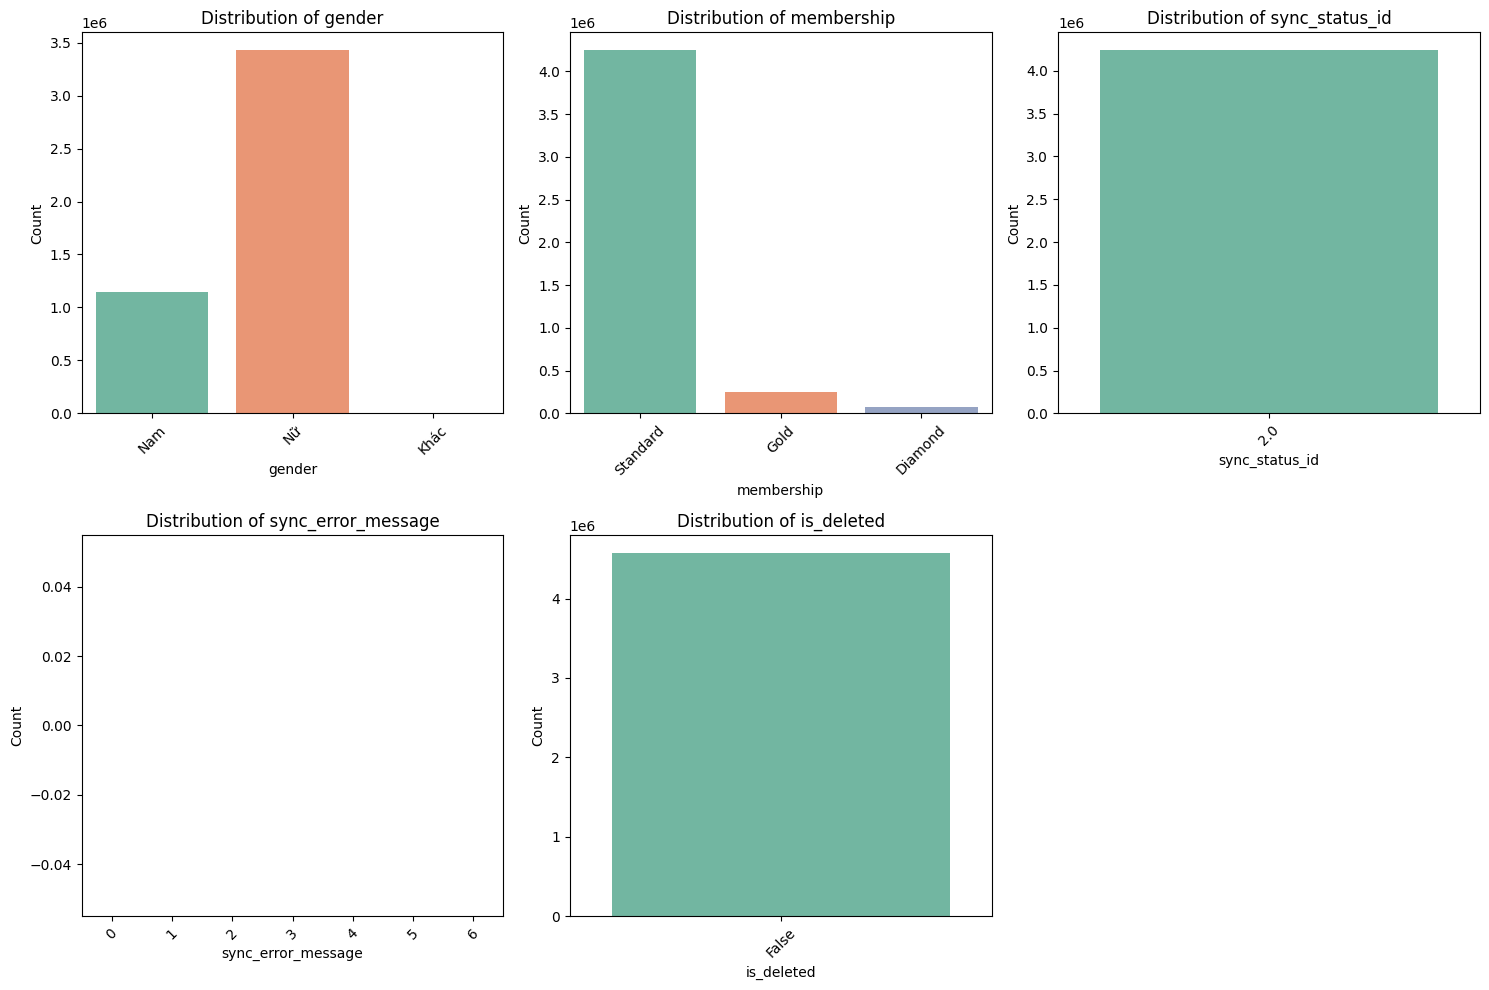

In [10]:
# Các cột cần phân tích
categorical_columns = ['gender', 'membership',	'sync_status_id', 'sync_error_message','is_deleted']


# 1. Trực quan hóa cho các cột phân loại (categorical)
num_plots = len(categorical_columns)
fig, axes = plt.subplots(nrows=(num_plots // 3) + (1 if num_plots % 3 != 0 else 0), ncols=3, figsize=(15, 5 * ((num_plots // 3) + 1)))

# Flatten axes để dễ sử dụng
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=user_chunk_df[col], ax=axes[i], palette='Set2')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Nếu có biểu đồ thừa, xóa đi
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\2854602230.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['install_app'],
C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\2854602230.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['install_app'],


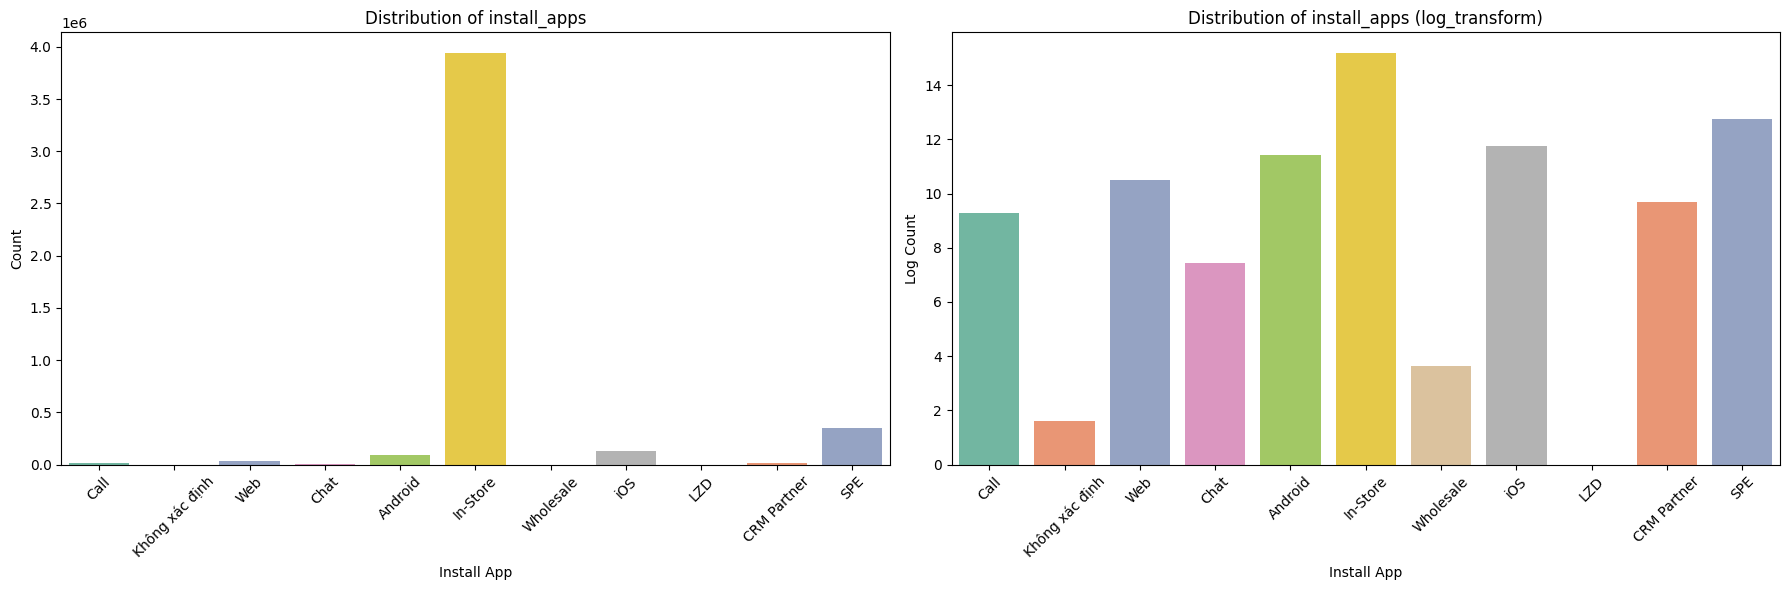

In [11]:
value_counts_location = user_chunk_df['install_app'].value_counts()

# Áp dụng log-transform cho count
value_counts_location = value_counts_location.with_columns((pl.col("count").log()).alias("log_counts"))

# Tạo 2 subplots trên cùng một hàng ngang
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Vẽ biểu đồ ban đầu (count)
sns.barplot(x=value_counts_location['install_app'], 
            y=value_counts_location['count'], 
            palette='Set2', ax=axes[0])
axes[0].set_title(f"Distribution of install_apps")
axes[0].set_xlabel("Install App")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Vẽ biểu đồ log-transformed
sns.barplot(x=value_counts_location['install_app'], 
            y=value_counts_location['log_counts'], 
            palette='Set2', ax=axes[1])
axes[1].set_title(f"Distribution of install_apps (log_transform)")
axes[1].set_xlabel("Install App")
axes[1].set_ylabel("Log Count")
axes[1].tick_params(axis='x', rotation=45)

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\2741407505.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['region'],
C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\2741407505.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['region'],


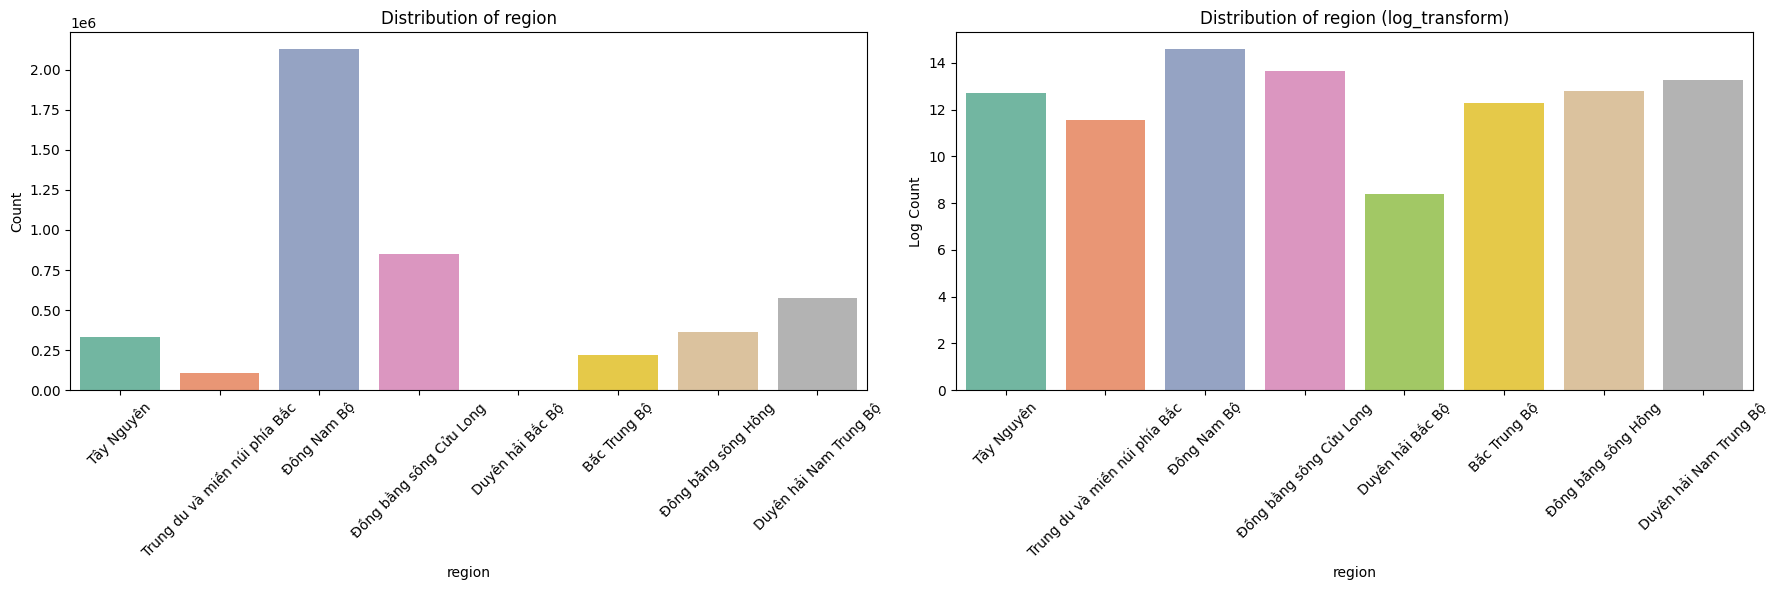

In [12]:
value_counts_location = user_chunk_df['region'].value_counts()

# Áp dụng log-transform cho count
value_counts_location = value_counts_location.with_columns((pl.col("count").log()).alias("log_counts"))

# Tạo 2 subplots trên cùng một hàng ngang
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Vẽ biểu đồ ban đầu (count)
sns.barplot(x=value_counts_location['region'], 
            y=value_counts_location['count'], 
            palette='Set2', ax=axes[0])
axes[0].set_title(f"Distribution of region")
axes[0].set_xlabel("region")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Vẽ biểu đồ log-transformed
sns.barplot(x=value_counts_location['region'], 
            y=value_counts_location['log_counts'], 
            palette='Set2', ax=axes[1])
axes[1].set_title(f"Distribution of region (log_transform)")
axes[1].set_xlabel("region")
axes[1].set_ylabel("Log Count")
axes[1].tick_params(axis='x', rotation=45)

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\247846884.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['location'], y=value_counts_location['count'], palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\247846884.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['location'], y=value_counts_location['log_counts'], palette='Set2')


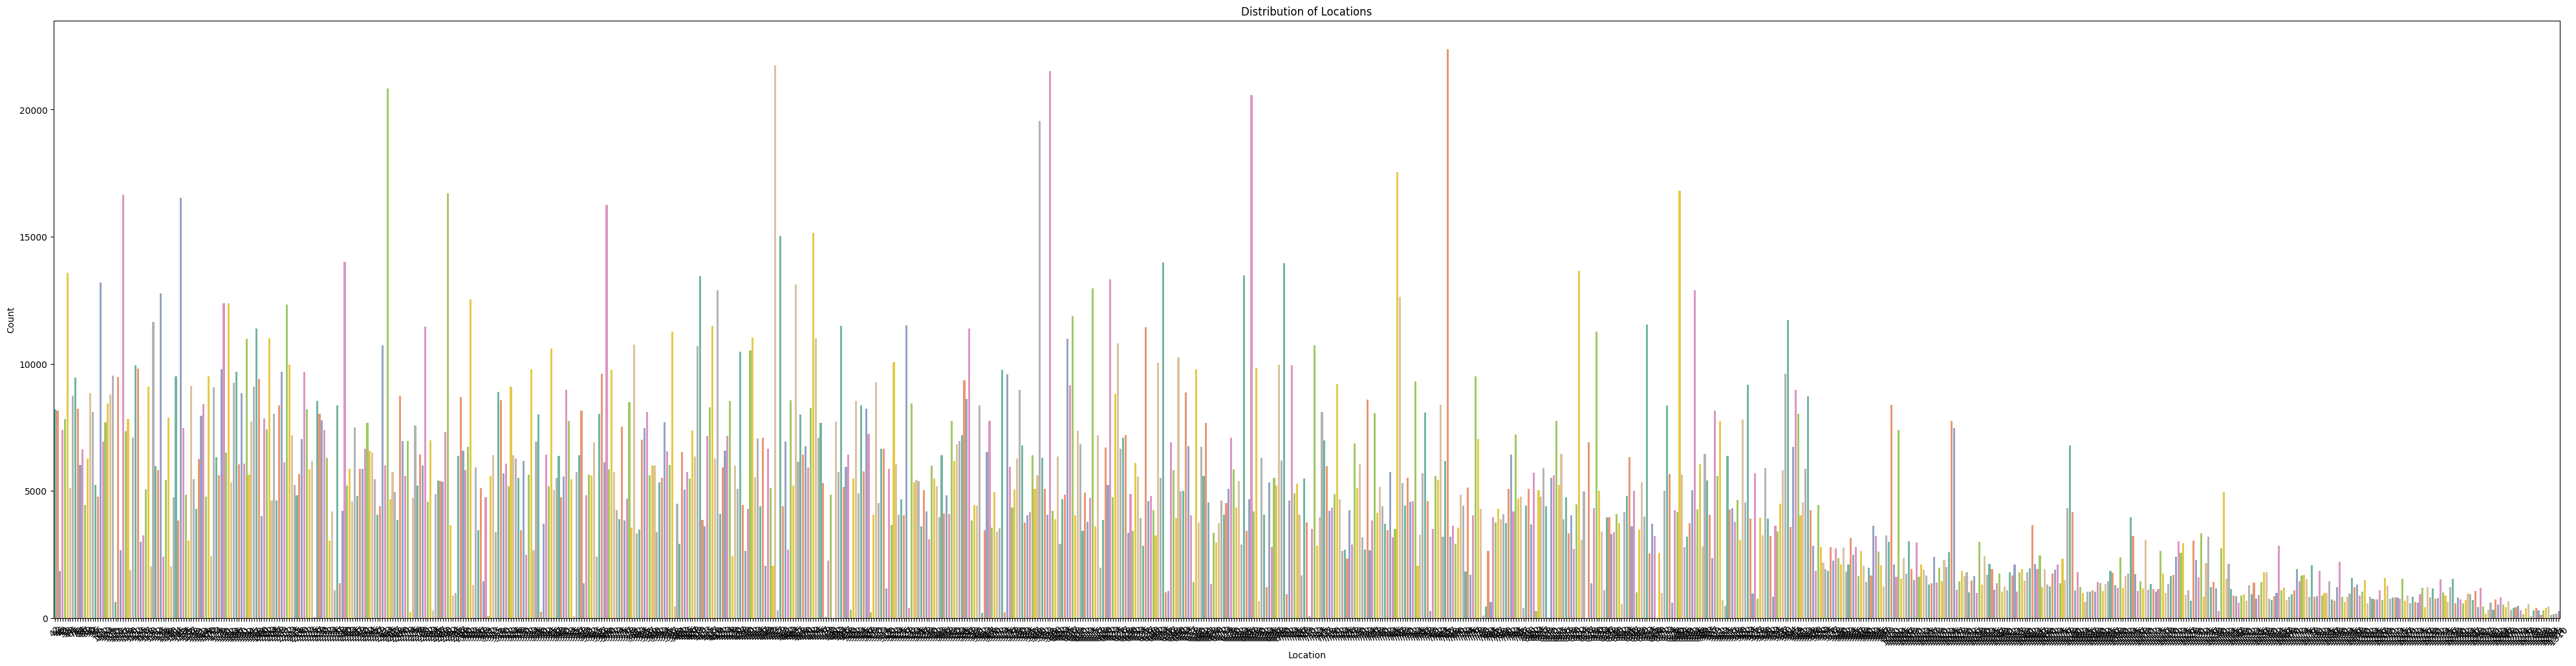

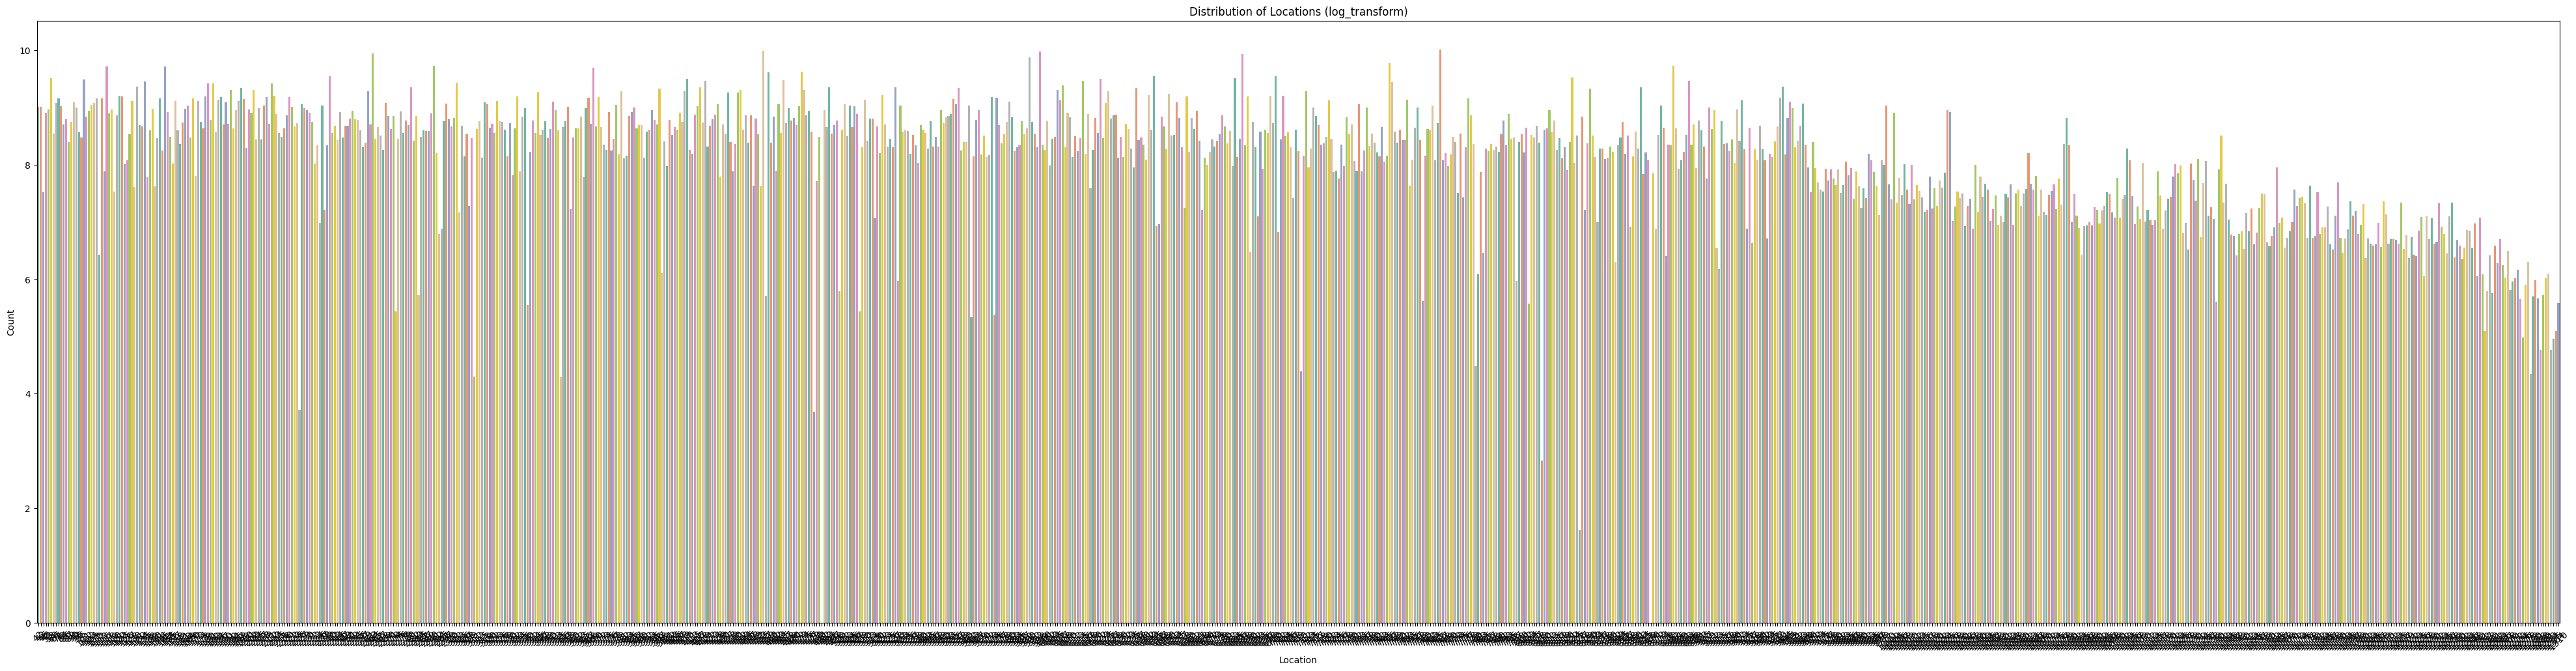

In [13]:
value_counts_location = user_chunk_df['location'].value_counts()

# Áp dụng log-transform cho count
value_counts_location = value_counts_location.with_columns((pl.col("count").log()).alias("log_counts"))

plt.figure(figsize=(50, 12))
sns.barplot(x=value_counts_location['location'], y=value_counts_location['count'], palette='Set2')
plt.title(f"Distribution of Locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Vẽ biểu đồ log-transformed
plt.figure(figsize=(50, 12))
sns.barplot(x=value_counts_location['location'], y=value_counts_location['log_counts'], palette='Set2')
plt.title(f"Distribution of Locations (log_transform)")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\212802238.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['location_name'], y=value_counts_location['count'], palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\212802238.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['location_name'], y=value_counts_location['log_counts'], palette='Set2')


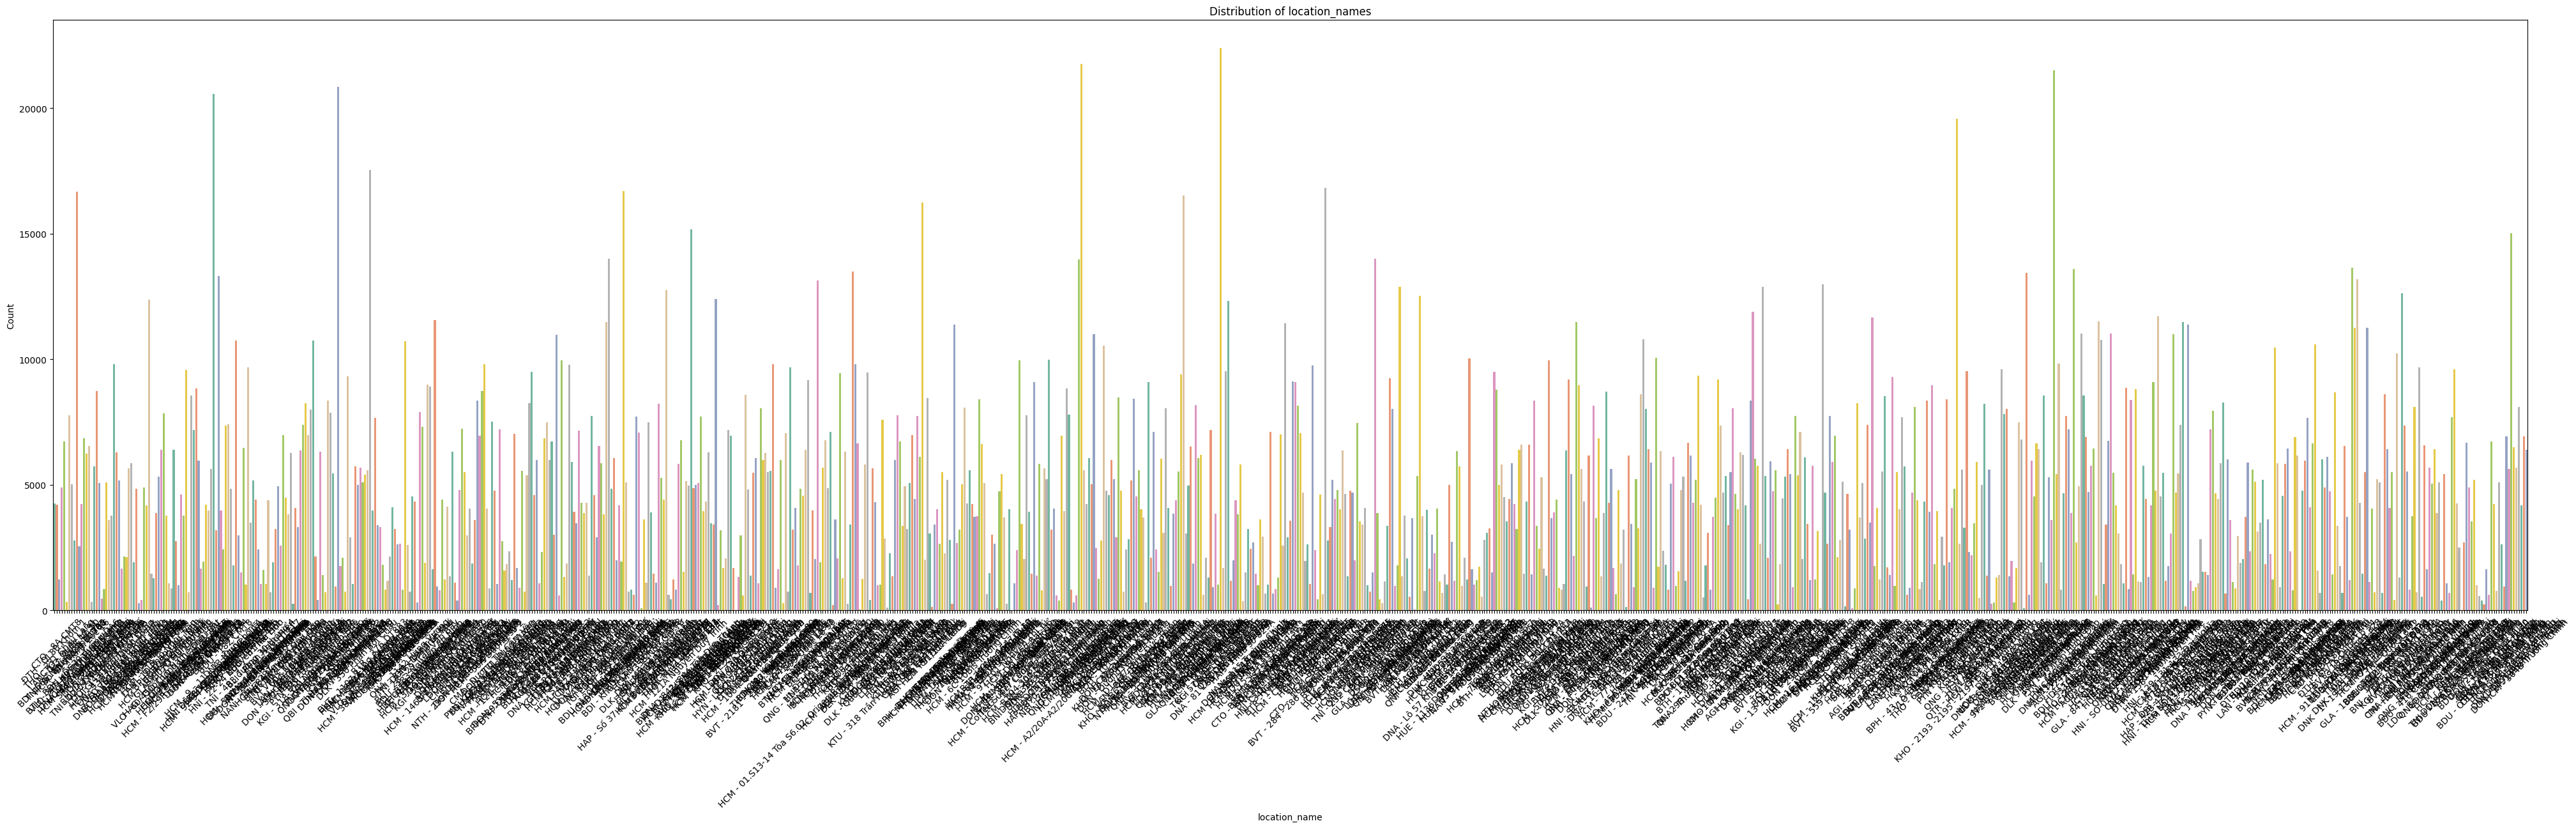

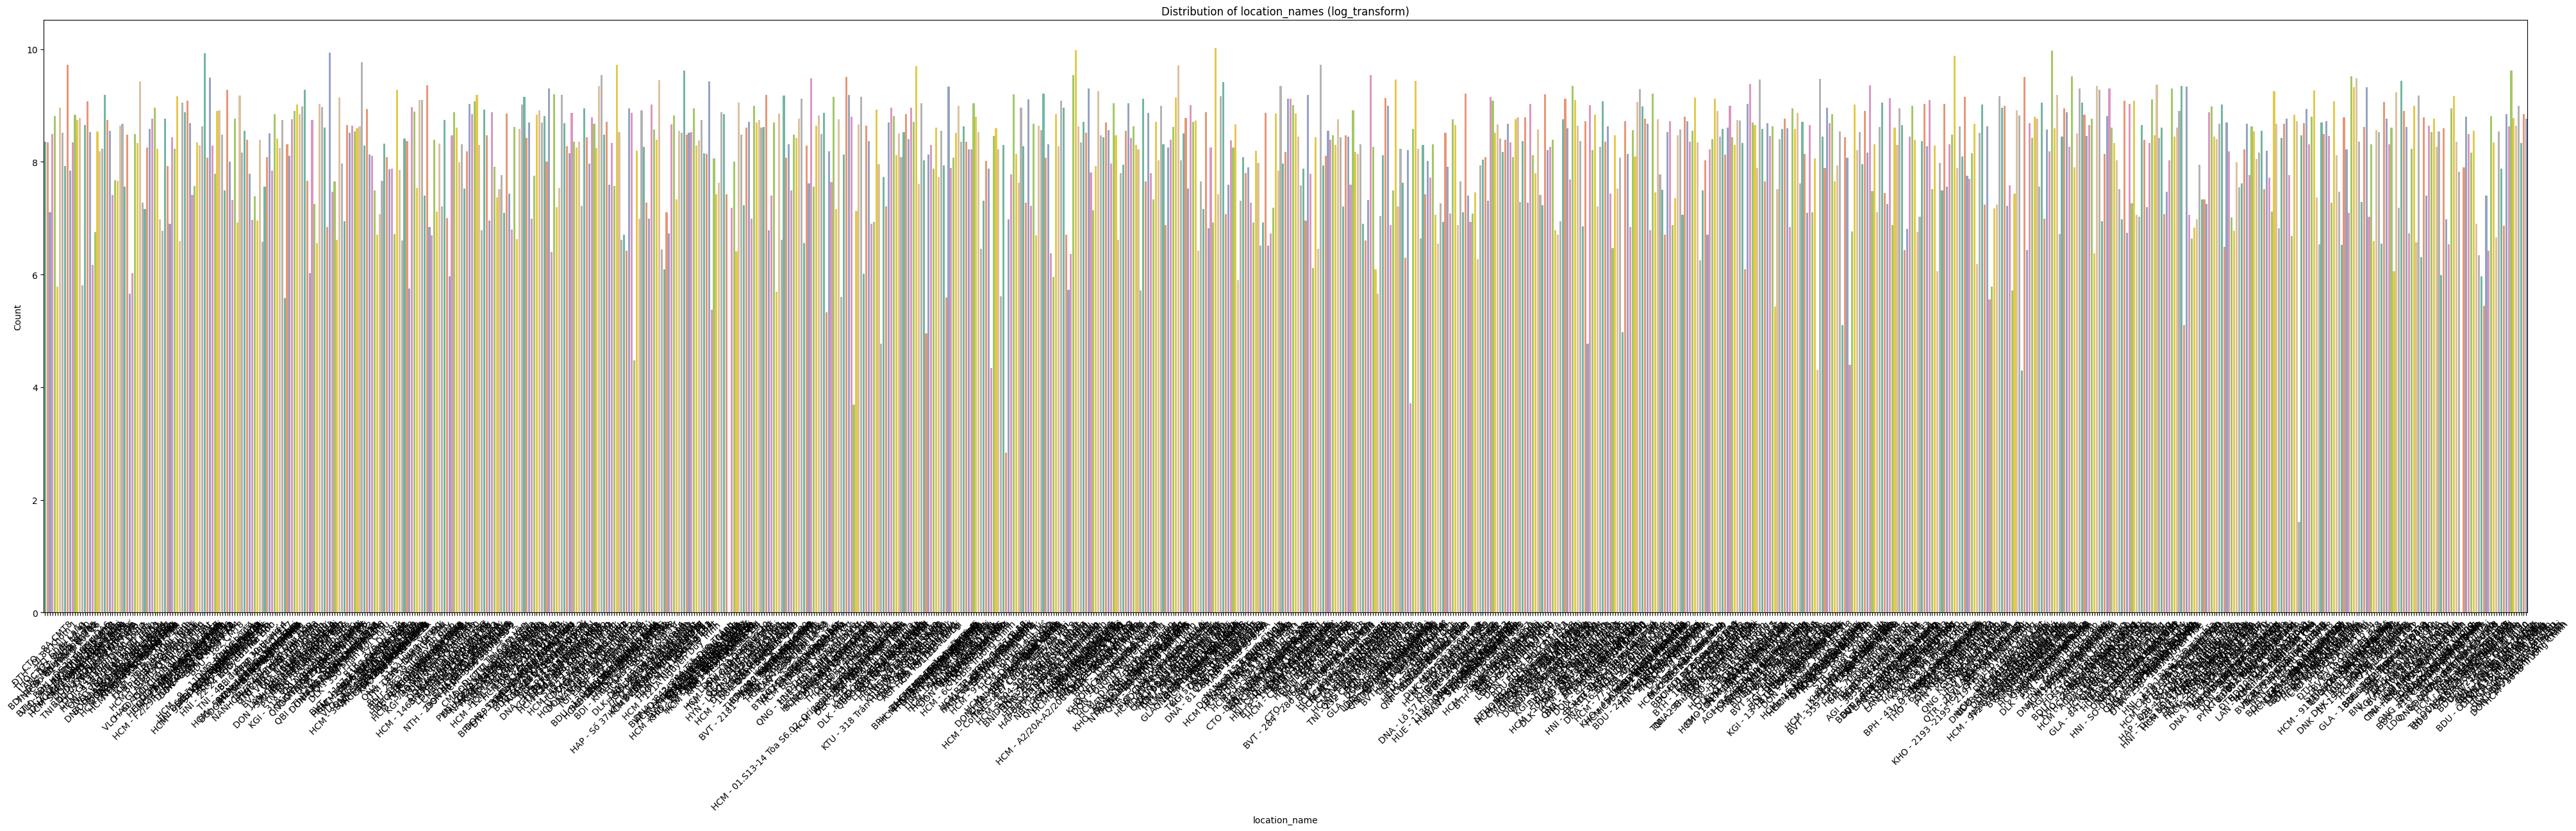

In [17]:
value_counts_location = user_chunk_df['location_name'].value_counts()

# Áp dụng log-transform cho count
value_counts_location = value_counts_location.with_columns((pl.col("count").log()).alias("log_counts"))

plt.figure(figsize=(50, 12))
sns.barplot(x=value_counts_location['location_name'], y=value_counts_location['count'], palette='Set2')
plt.title(f"Distribution of location_names")
plt.xlabel("location_name")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Vẽ biểu đồ log-transformed
plt.figure(figsize=(50, 12))
sns.barplot(x=value_counts_location['location_name'], y=value_counts_location['log_counts'], palette='Set2')
plt.title(f"Distribution of location_names (log_transform)")
plt.xlabel("location_name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\4168016858.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['province'], y=value_counts_location['count'], palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\4168016858.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['province'], y=value_counts_location['log_counts'], palette='Set2')


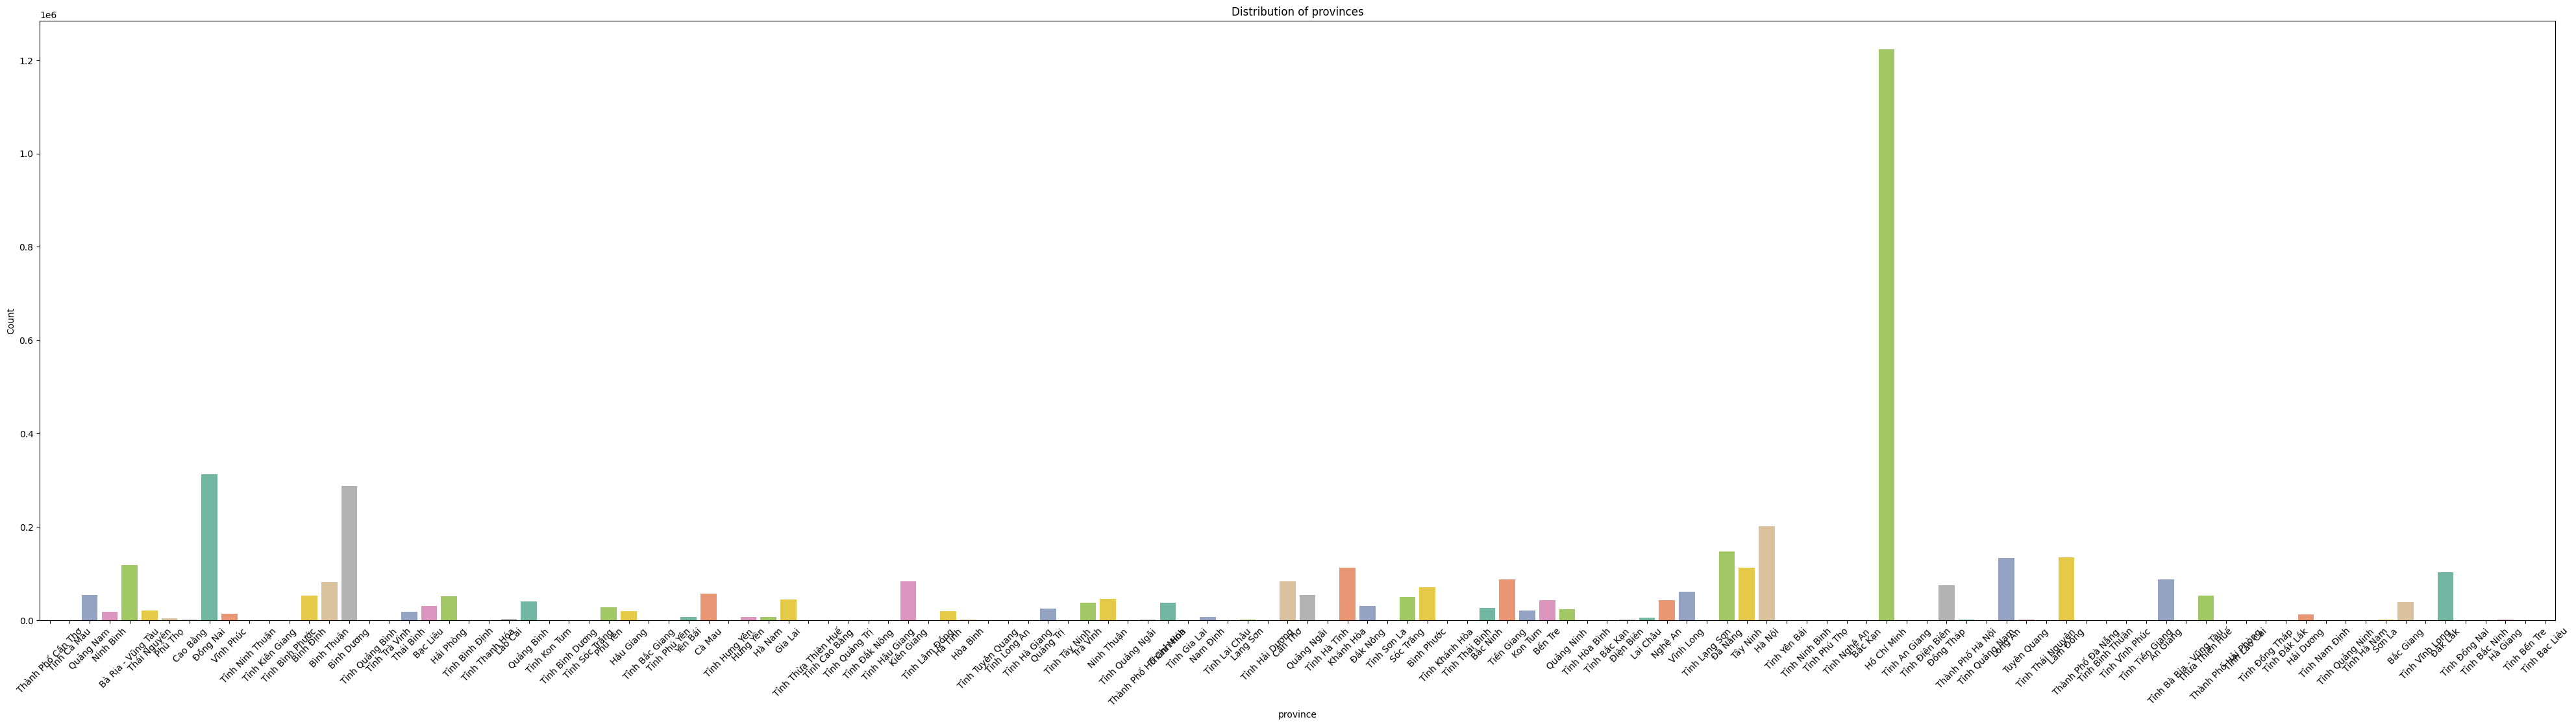

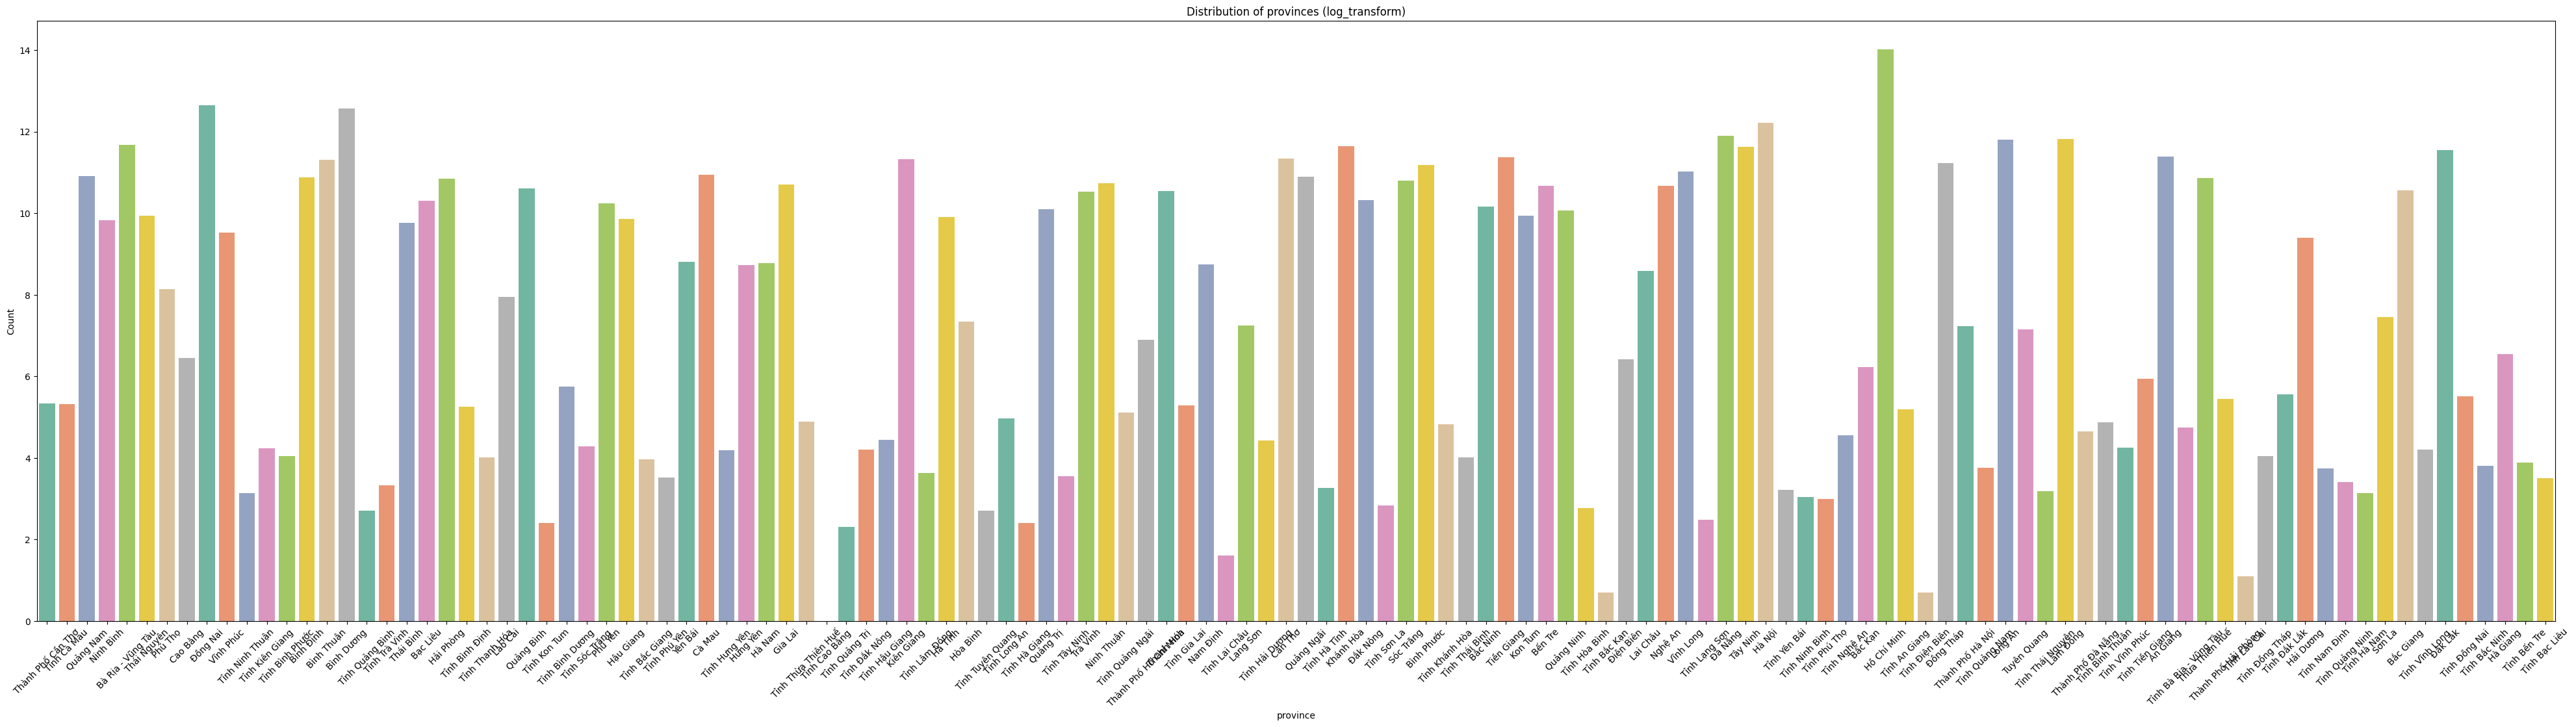

In [15]:
value_counts_location = user_chunk_df['province'].value_counts()

# Áp dụng log-transform cho count
value_counts_location = value_counts_location.with_columns((pl.col("count").log()).alias("log_counts"))

plt.figure(figsize=(50, 12))
sns.barplot(x=value_counts_location['province'], y=value_counts_location['count'], palette='Set2')
plt.title(f"Distribution of provinces")
plt.xlabel("province")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Vẽ biểu đồ log-transformed
plt.figure(figsize=(50, 12))
sns.barplot(x=value_counts_location['province'], y=value_counts_location['log_counts'], palette='Set2')
plt.title(f"Distribution of provinces (log_transform)")
plt.xlabel("province")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\993672644.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['district'], y=value_counts_location['count'], palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\993672644.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['district'], y=value_counts_location['log_counts'], palette='Set2')


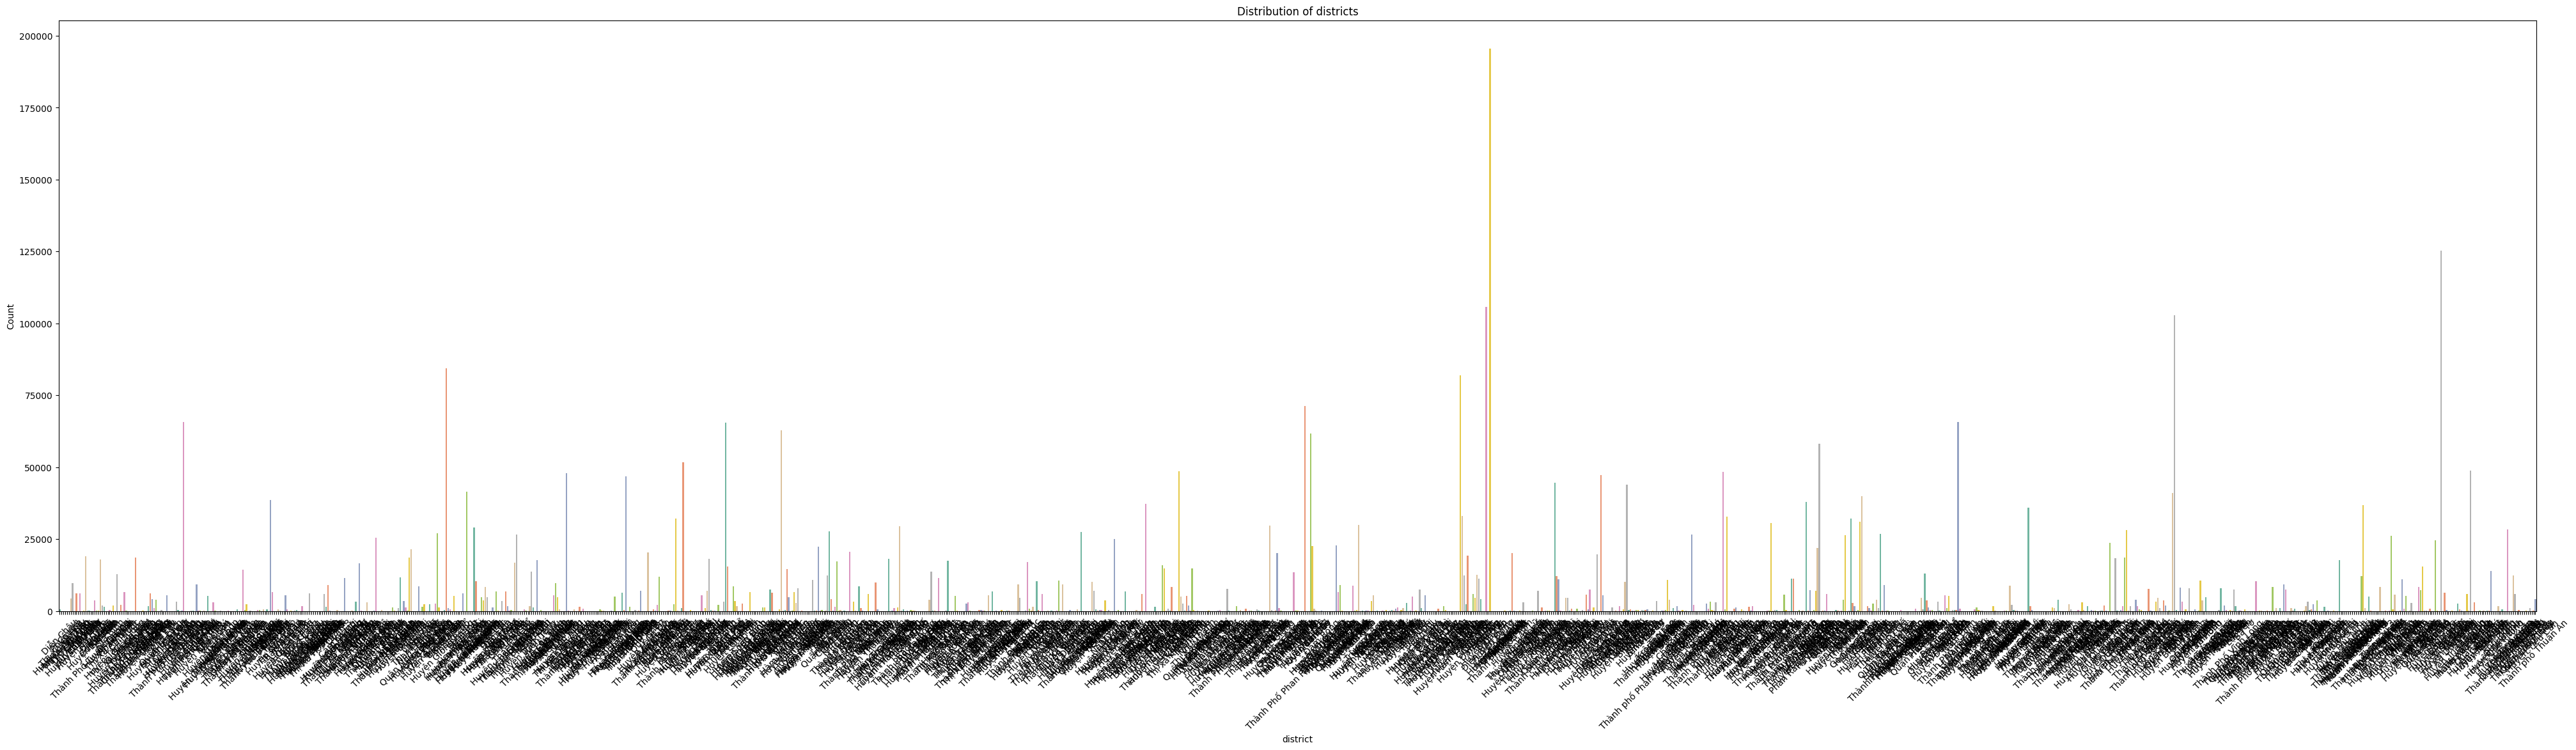

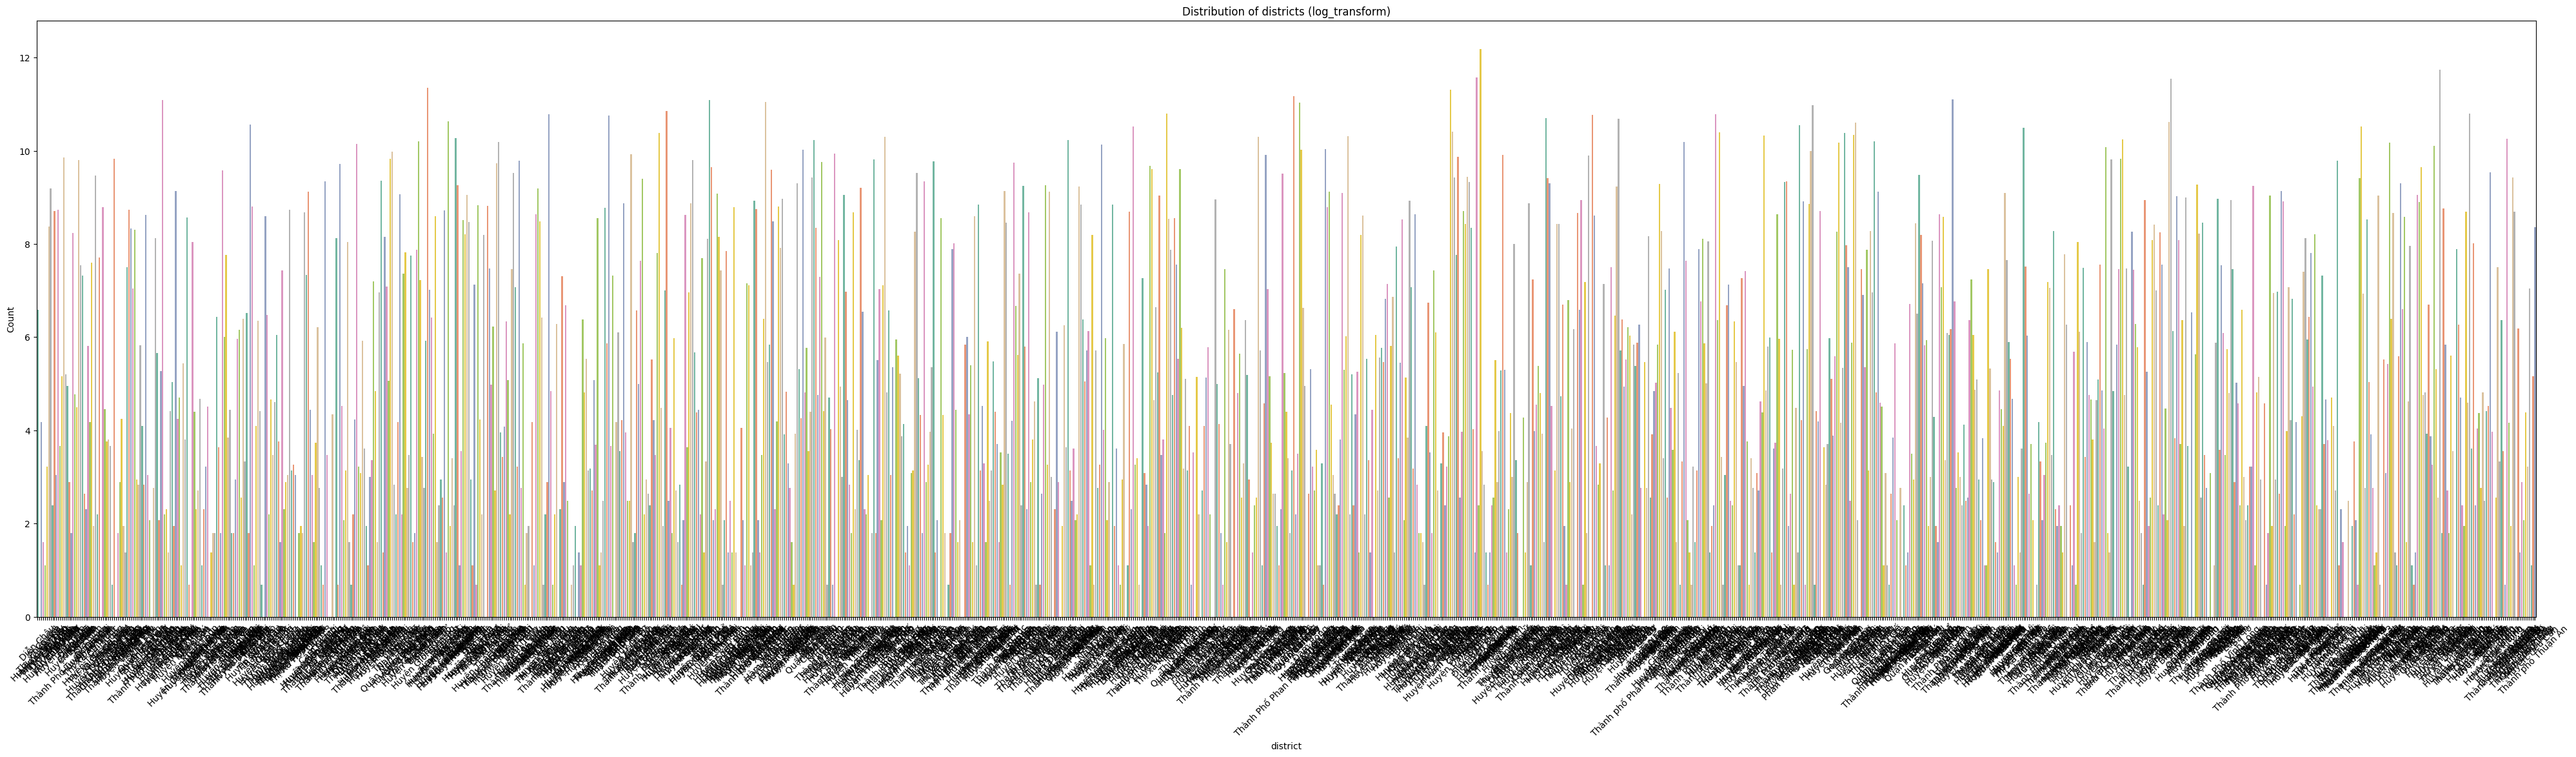

In [16]:
value_counts_location = user_chunk_df['district'].value_counts()

# Áp dụng log-transform cho count
value_counts_location = value_counts_location.with_columns((pl.col("count").log()).alias("log_counts"))

plt.figure(figsize=(50, 12))
sns.barplot(x=value_counts_location['district'], y=value_counts_location['count'], palette='Set2')
plt.title(f"Distribution of districts")
plt.xlabel("district")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Vẽ biểu đồ log-transformed
plt.figure(figsize=(50, 12))
sns.barplot(x=value_counts_location['district'], y=value_counts_location['log_counts'], palette='Set2')
plt.title(f"Distribution of districts (log_transform)")
plt.xlabel("district")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Task 2: Phân tích đa biến (thống kê và trực quan hóa dữ liệu)


## Task 3: Nhận định sơ bộ một số công việc cần làm ở bước tiền xử lý. Ví dụ:

- Những trường thông tin nào không có nhiều thông tin --> nên loại bỏ

- Những trường thông tin nào cần xử lý NULL

- Những trường thông tin nào cần xử lý ngoại lệ (Outlier)

- Những trường thông tin nào cần xử lý phân bố không đều?
